# Seaborn
: Matplotlib의 기능과 스타일을 확장한 파이썬 시각화 도구의 고급 버전
- 가장 현대적인 그래프라 평가받음
- matplotlib 기반

In [2]:
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [3]:
# Seaborn package에서 제공하는 titanic 데이터셋 가져오기
import seaborn as sns

In [4]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 회귀선이 있는 산점도

In [17]:
sns.set_style('darkgrid') # darkgrid, whitegrid, grid

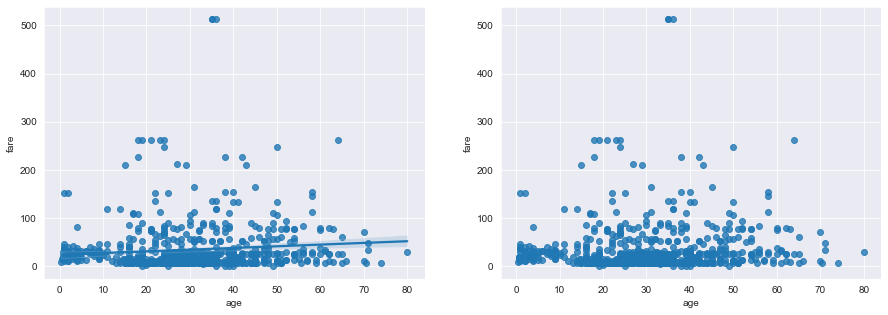

In [18]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 선형 회귀선이 포함된 그래프 그리기
sns.regplot(
    x='age',
    y='fare',
    data=titanic,
    ax = ax1
)

# 선형 회귀선이 미포함된 그래프 그리기
sns.regplot(
    x='age',
    y='fare',
    data=titanic,
    ax = ax2,
    fit_reg=False
)

plt.show()

---
### 히스토그램 / 커널 밀도 그래프
: 커널밀도 함수는 그래프와 x축 사이의 면적이 1이 되는 밀도분포 함수

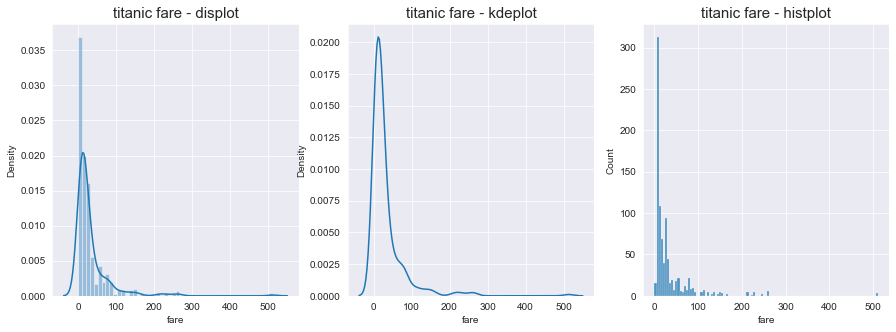

In [25]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# 히스토그램 / 커널 밀도
sns.distplot(titanic.fare, ax=ax1)

# 커널 밀도
sns.kdeplot(titanic.fare, ax=ax2)

# 히스토그램
sns.histplot(titanic.fare, ax=ax3)
# sns.histplot(x='fare', data=titanic, ax=ax3)

# title
ax1.set_title('titanic fare - displot', size = 15)
ax2.set_title('titanic fare - kdeplot', size = 15)
ax3.set_title('titanic fare - histplot', size = 15)

plt.show()

> fare가 대부분 100달러 미만에 집중되어있다.

---
### 히트맵(heatmap)
- 2개의 범주형 변수를 각각 x, y축에 놓고 데이터를 매트릭스 형태로 분류

In [26]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [27]:
table = titanic.pivot_table(index=['sex'], columns=['class'], aggfunc='size') 
# 각 범주 항목의 크기(개수)로 aggfunc
table

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


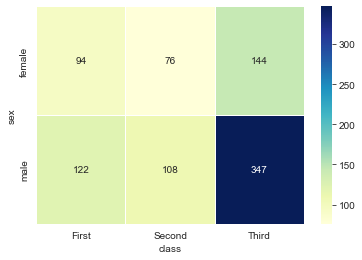

In [37]:
sns.heatmap(
    table,
    annot=True, # 각 상자의 중심에 숫자 표기
    fmt='d', # 숫자를 정수로 표기하기
    linewidths=1, # 각 상자 간 간격 조정
    cmap='YlGnBu', # yellow, grin, blue
    # cbar=False # 우측 컬러 인디케이터 숨기기
)

plt.show()

> 밝을수록 많다.

### 범주형 데이터의 산점도
- 범주형 변수에 들어있는 각 범주별 데이터의 분포를 확인

In [38]:
sns.set_style('whitegrid')

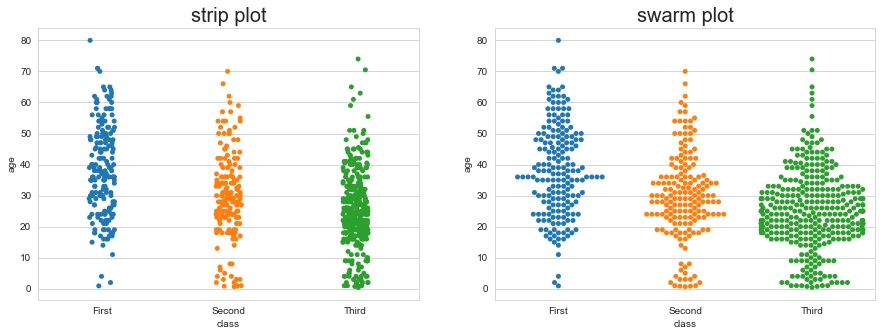

In [43]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.stripplot(
    x='class',
    y='age',
    data=titanic,
    ax=ax1
)
sns.swarmplot(
    x='class',
    y='age',
    data=titanic,
    ax=ax2
)

# title
ax1.set_title('strip plot', size=20)
ax2.set_title('swarm plot', size=20)

plt.show()

> stripplot은 중복값을 잡을 수 없다.(좌우 폭이 한정됨)

---
### 막대 그래프

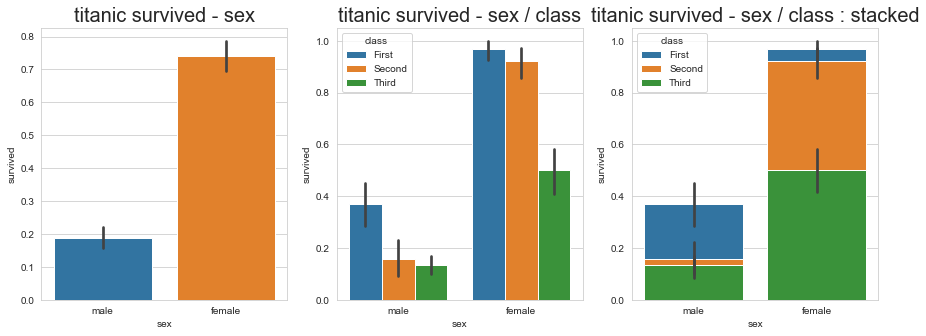

In [52]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.barplot(
    x='sex',
    y='survived',
    data=titanic,
    ax=ax1,
)

# x, y, hue
sns.barplot(
    x='sex',
    y='survived',
    hue='class',
    data=titanic,
    ax=ax2,
)

# x, y, hue 누적 출력
sns.barplot(
    x='sex',
    y='survived',
    hue='class',
    dodge=False, # R : beside
    data=titanic,
    ax=ax3,
)

ax1.set_title('titanic survived - sex', size=20)
ax2.set_title('titanic survived - sex / class', size=20)
ax3.set_title('titanic survived - sex / class : stacked', size=20)

plt.show()

### 오차막대(error bar) : 95퍼센트의 신뢰구간
- 생존률을 0과 1 사이로 예측했을 때 오차율

---
### 빈도그래프

In [53]:
sns.set_style('whitegrid')

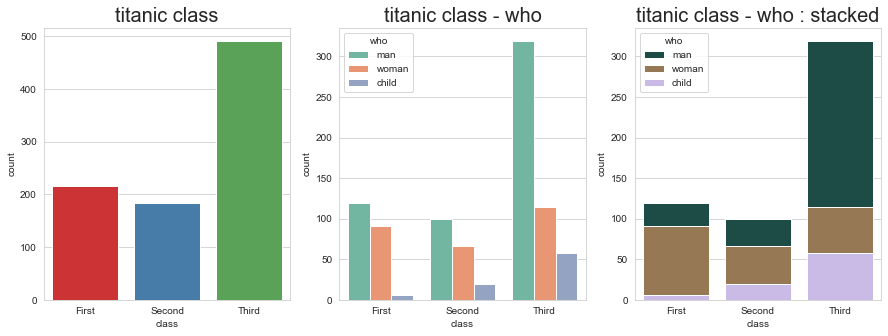

In [77]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.countplot(
    x='class',
    data=titanic,
    palette='Set1',
    ax=ax1
)

# hue
sns.countplot(
    x='class',
    hue='who',
    data=titanic,
    palette='Set2',
    ax=ax2
)

# dodge
sns.countplot(
    x='class',
    hue='who',
    dodge=False,
    data=titanic,
    palette='cubehelix',
    ax=ax3
)

ax1.set_title('titanic class', size=20)
ax2.set_title('titanic class - who', size=20)
ax3.set_title('titanic class - who : stacked', size=20)

plt.show()

In [58]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


---
# 박스플롯 / 바이올린 그래프
- 박스플롯은 범주형 데이터의 분포와 주요 통계지표를 함께 제공하지만, 데이터가 퍼져있는 정도(분산)를 알기 어렵다.
- 바이올린 그래프 : 박스플롯에 커널밀도함수 그래프가 추가된다.

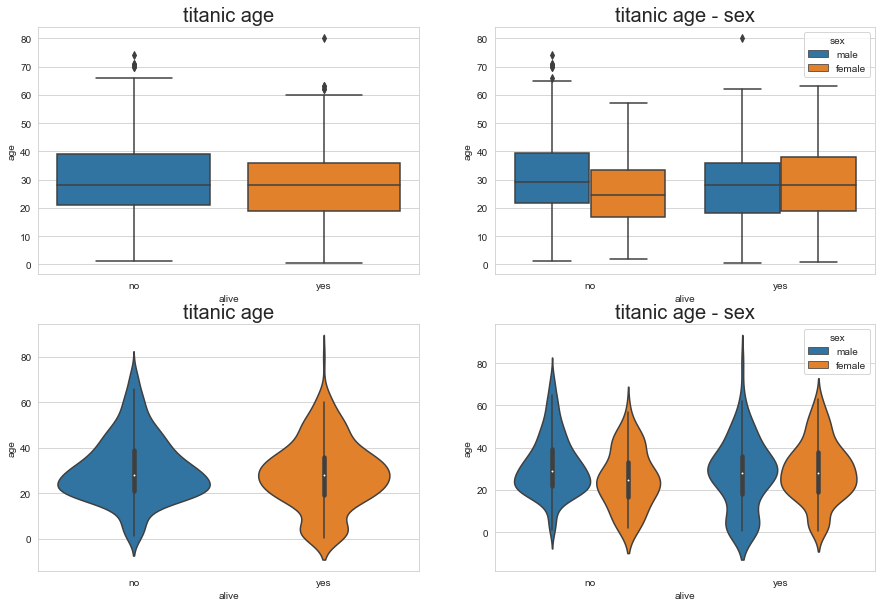

In [78]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

# box plot 기본값
sns.boxplot(
    x='alive',
    y='age',
    data=titanic,
    ax=ax1
)

# box plot : hue
sns.boxplot(
    x='alive',
    y='age',
    hue='sex',
    data=titanic,
    ax=ax2,
)

# violinplot
sns.violinplot(
    x='alive',
    y='age',
    # hue='sex',
    data=titanic,
    ax=ax3,
)

# violinplot
sns.violinplot(
    x='alive',
    y='age',
    hue='sex',
    data=titanic,
    ax=ax4,
)

ax1.set_title('titanic age', size=20)
ax2.set_title('titanic age - sex', size=20)
ax3.set_title('titanic age', size=20)
ax4.set_title('titanic age - sex', size=20)

plt.show()

---
### 조인트 그래프
- 산점도를 기본으로 각 축에 대한 히스토그램을 동시에 제공한다.

Text(0.5, 0.98, 'titanic fare - kde')

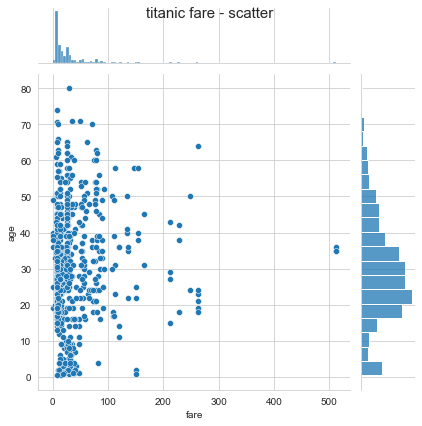

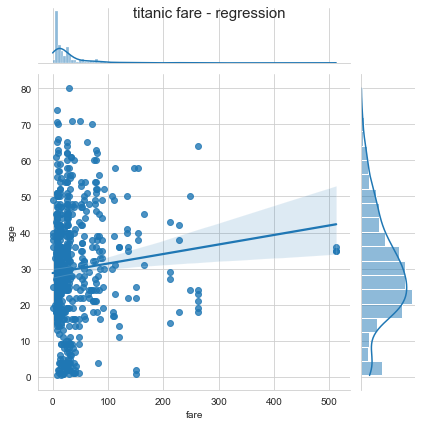

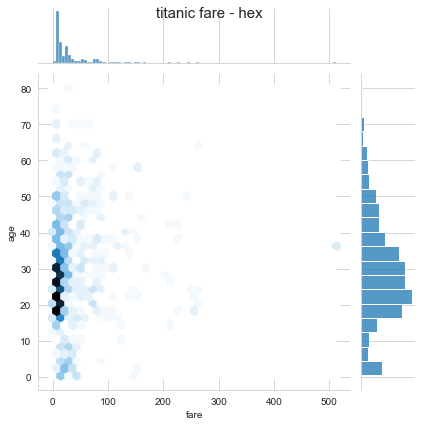

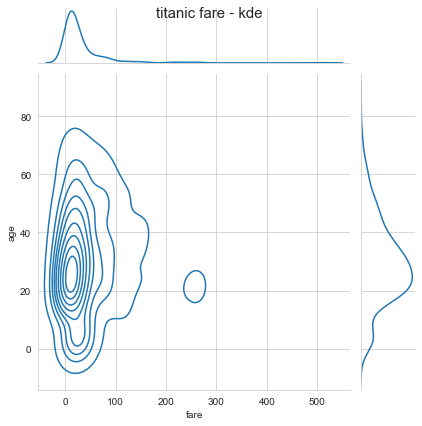

In [83]:
# joint graph : scatter(default)
j1 = sns.jointplot(
    x='fare',
    y='age',
    data=titanic
)

# joint graph : 회귀선
j2 = sns.jointplot(
    x='fare',
    y='age',
    kind='reg',
    data=titanic
)

# joint graph : 육각 그래프
j3 = sns.jointplot(
    x='fare',
    y='age',
    kind='hex',
    data=titanic
)

# joint graph : 커널밀도 그래프 ~ 간격이 좁을수록 밀도가 높다
j4 = sns.jointplot(
    x='fare',
    y='age',
    kind='kde',
    data=titanic
)

j1.fig.suptitle('titanic fare - scatter', size=15)
j2.fig.suptitle('titanic fare - regression', size=15)
j3.fig.suptitle('titanic fare - hex', size=15)
j4.fig.suptitle('titanic fare - kde', size=15)

---
### 조건을 적용하여 화면을 grid로 분할하기

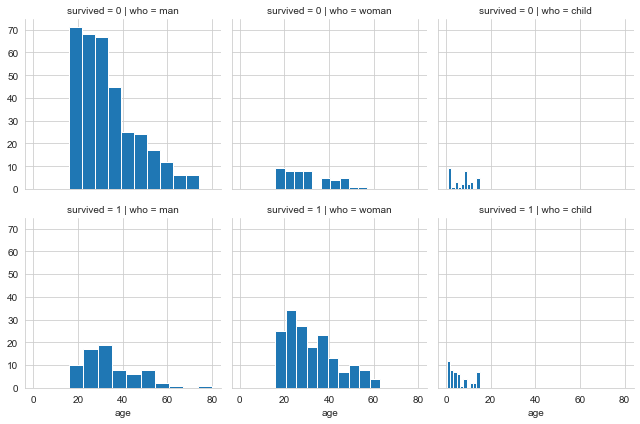

In [84]:
# 조건에 따라 grid 나누기
g = sns.FacetGrid(
    data=titanic,
    col='who',
    row='survived',

)
g=g.map(plt.hist, 'age') # y축 age

---
### 이변수 데이터 분포
- 매트릭스 형태로 짝을 지어 표현

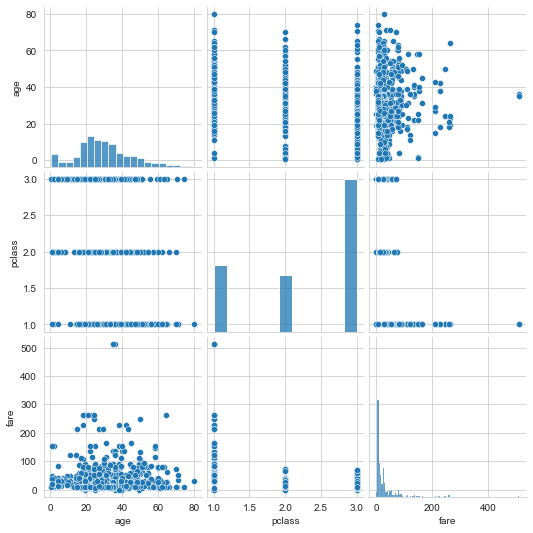

In [86]:
# titanic 데이터 셋 중에서 분석데이터 선택하기
titanic_pair = titanic[['age', 'pclass', 'fare']]

# 조건에 따라 grid 나누기
sns.pairplot(
    titanic_pair
)

plt.show()